<a href="https://colab.research.google.com/github/Nikitoniy/Yandex_Data_Analysis/blob/main/3_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE_%D1%80%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%BC_%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%BE%D0%BA%D0%B0%D1%82%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Исследование данных о российском кинопрокате



**Описание проекта**:

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.
Таблицы с данными опубликованы на портале открытых данных Министерства культуры. Наборы данных содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель проекта**:

По ходу исследования необходимо проанализировать и, при необходимости, предобработать данные: поменять тип данных, убрать пустые значения, убрать дубликаты и ошибки записи информации в таблицу. В процессе исследования будут добавлены колонки со следующей информацией: год выпуска фильма в прокат, имя главного режиссера и главного жанра фильма, доля государственной поддержки у фильмов. Будут проанализированы в виде графиков и таблиц: количество выпускаемых фильмов в зависимости от даты выхода, их сборов в зависимости от даты выхода, а также сборы фильмов в разрезе возврастных ограничений. Отдельно необходимо проанализировать фильмы с государственной поддержкой, в том числе их окупаемость.

**Описание данных в таблицах:**   
- Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений:
    - `title` — название фильма;
    - `puNumber` — номер прокатного удостоверения;
    - `show_start_date` — дата премьеры фильма;
    - `type` — тип фильма;
    - `film_studio` — студия-производитель;
    - `production_country` — страна-производитель;
    - `director` — режиссёр;
    - `producer` — продюсер;
    - `age_restriction` — возрастная категория;
    - `refundable_support` — объём возвратных средств государственной поддержки;
    - `nonrefundable_support` — объём невозвратных средств государственной поддержки;
    - `financing_source` — источник государственного финансирования;
    - `budget` — общий бюджет фильма;
    - `ratings` — рейтинг фильма на КиноПоиске;
    - `genres` — жанр фильма.

- Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах:
    - `puNumber` — номер прокатного удостоверения;
    - `box_office` — сборы в рублях.

## Изучение данных

### Добавим необходимые библиотеки для работы с данными.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

display(pd.__version__)

'1.5.3'

### Общая информация по датасетам

In [ ]:
try:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    movies = pd.read_csv('https://code.s3.yandex.net//datasets/mkrf_movies.csv')
#таблица mkrf_movies

try:
    shows = pd.read_csv('/datasets/mkrf_shows.csv',sep=',')
except:
    shows = pd.read_csv('https://code.s3.yandex.net//datasets/mkrf_shows.csv',sep=',')
#таблица mkrf_shows

display(movies.info()) #информация по таблице movies
display('-'*50) #отделяю чертой для удобства
display(shows.info()) #информация по таблице shows

pd.set_option('display.float_format', '{:.2f}'.format)
#в таблице mkrf_shows странно читаются суммы по сборам, применил форматирование сумм

pd.set_option('display.max_columns', 50)
#+ настройка для показа все колонок без скрытия

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

### Первые пять - десять строк для ознакомления с таблицами

In [ ]:
display(movies.query('refundable_support.notna()').head(10))
#информация по таблице movies,
#решил посмотреть на заполненные строки refundable_support для полной картины

display(shows.head())
#информация по таблице shows

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.1,"драма,мелодрама"
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,NaN
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.3,"комедия,фантастика"
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.2,драма
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.4,драма
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18T12:00:00.000Z,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,Министерство культуры,6.1,"мультфильм,фэнтези,история"
1870,А зори здесь тихие..._,111002915,2015-03-16T12:00:00.000Z,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,Фонд кино,8.5,"драма,военный,история"
1871,Две женщины,111013714,2014-10-02T12:00:00.000Z,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"Министерство культуры, Фонд кино",6.7,драма
1903,Призрак_.,111001815,2015-03-02T12:00:00.000Z,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,Фонд кино,7.0,"триллер,боевик,приключения"
1912,Ведьма .,111002215,2015-03-05T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,Министерство культуры,7.4,"фэнтези,приключения,драма"


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
genres                  13.04
ratings                 12.92
producer                 7.59
film_studio              0.24
director                 0.12
production_country       0.03
title                    0.00
puNumber                 0.00
show_start_date          0.00
type                     0.00
age_restriction          0.00
dtype: float64

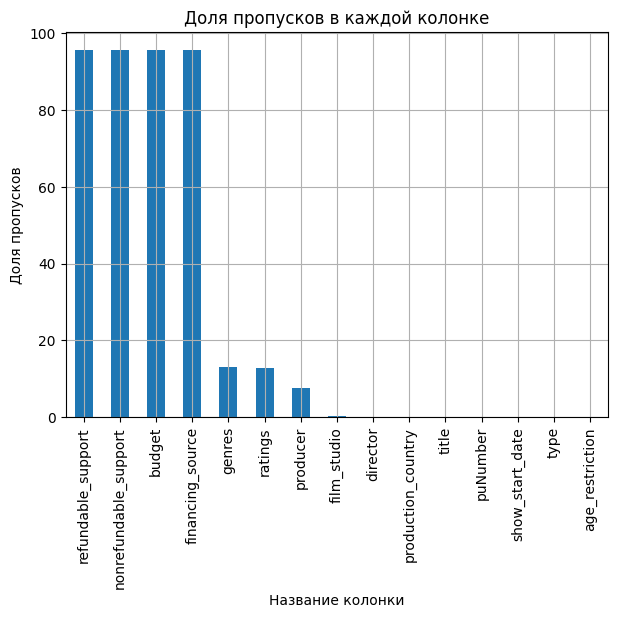

In [ ]:
#Увидел большое колво пустых значений, написал функцию для их расчета + построение графика
def ratio_movies(df):
    total = len(df)
    # Подсчет общего количества строк в таблице

    div = round((df.isnull().sum() / total)*100,2)
    # Вычисление доли пропусков в каждой колонке


    div.sort_values(ascending=False).plot(xlabel='Название колонки',
                                                           ylabel='Доля пропусков',
                                                           title='Доля пропусков в каждой колонке',
                                                           kind='bar', grid=True,figsize=(7,5))
    # Построение столбчатой диаграммы для каждой колонки, сортирую по убыванию

    display(div.sort_values(ascending=False))
    plt.show()
    #вывожу график + вывожу % пропусков по каждой колонке

ratio_movies(movies)

**По итогам выявления первичной информации по таблице выявлены некоторые замечания:**
1. В таблице **movies**:
    1.1. Поменять тип данных в колонках на int:
    - `puNumber`;
    1.2. Поменять тип данных в колонках на float:
    - `ratings`;
    1.3. Поменять тип данных в колонках на datetime:
    - `show_start_date`;
    
2. Таблица **shows**:
    2.1. Странно транслировались данные в колонке box_office. Было исправлено благодаря применению разделителя.

**Также было выявлено слишком большое количество пустых значений в таблице movies - доля пустых значений составляет до 95% процентов!**

Доля пустых значений в колонках таблицы **movies** составляет:
1. В следующих колонках составляет 95.5% от всей таблицы. У данных колонок одинаковое количество пустых значений:
    - `refundable_support`       
    - `nonrefundable_support`    
    - `budget`
    - `financing_source`
2. В следующих колонках составляет до 13% от всей таблицы:
    - `genres`
    - `ratings`
3. В следующих колонках составляет до 10% от всей таблицы:
    - `producer` - 7.6%
    - `film_studio` - 0.2%               
    - `director` - 0.1%                 
    - `production_country` - 0.03%
    
Пустые значения в таблице **shows** отсутствуют.

## Предобработка данных

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

#### Необходимо соединить две таблицы по одинаковой колонке - `puNumber`. Так как тип данных этой колонки в двух таблицах различается, начну с изменению типов данных в таблице **movies** в соответствии с замечаниями в колонке `puNumber`

In [ ]:
#movies['puNumber'] = movies['puNumber'].astype(int)
#здесь вышла ошибка, попробую по-другому поменять тип данных

movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')
#намеренно привожу к типу float, но меняю неподходящие значения на пустые

movies[movies['puNumber'].isna()]
movies = movies.query('puNumber.notna()')
#удаляю строку с пустым значением тут для того, чтобы привести к int
#одна удаленная строка составляет менее 0.1% от всей таблицы, поэтому удаляю

movies['puNumber'] = movies['puNumber'].astype(int)
#меняю тип на int в соответствии с замечаниями

movies.info() #проверка изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Промежуточный итог:** в ходе объединения таблиц было выявлено пустое значение в колонке `puNumber`, поэтому было принято решение начать предобработку данных с изменения типов данных колонок. Удалил пустое значение в колонке `puNumber`, которое мешало для изменения типа данных - оно составило менее 0.1% от всей таблицы. Тип данных по колонке `puNumber` изменен на int.

#### Продолжим изменять тип данных в таблице movies. Колонка `show_start_date`

In [ ]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')
#привожу к формату дата и время

display(movies.info())
display(movies.head())
#первые пять строк + информация по таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


**Промежуточный итог:** тип данных в колонке `show_start_date` был изменен на datetime. В данной колонке не выявлено "неправильных" данных, которые мешали бы предобработке, а также не было пустых значений.

#### Предобработка  колонки `ratings`

In [ ]:
movies['ratings'].unique()
#увидел, что есть значения в процентах, я так понимаю, что это тоже оценка

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**Замечание:** по ходу предобработки в колонке `ratings` замечены значения в процентах. Перед тем, как менять тип данных, удалим проценты и заменим на оценку.

In [ ]:
movies['ratings'] = movies['ratings'].replace('%', '', regex=True)
#убираю знак процента

movies['ratings']=pd.to_numeric(movies['ratings'],errors='coerce')
#меняю тип данных на float

#решил написать функцию, которая будет брать значения больше 10 и делить на 100
#для получения десятибалльной шкалы
def rate(data):
    rate_data = [] #пустой список
    for i in data:
        if i > 10: #условие, если больше 10
            rate_data.append(i / 10) #делю на 10
        else:
            rate_data.append(i) #получаю новый список

    return rate_data

movies['ratings'] = rate(movies['ratings'])
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

**Промежуточный итог:** изменил тип данных в колонке `ratings` на float. Также были замечены и далее убраны проценты по данной колонке и изменены на оценку по десятибалльной шкале.

**Вывод:** были изменены типы данных в колонках в соответствии с замечаниями.

Также начал предобработку данных в части рейтинга фильмов и номеров прокатного удостоверения. В колонке с рейтингами были найдены значения в процентах, например, 98%, 88% и тд. Такие значеня были изменены на десятичные дроби, соответственно, на 9.5, 8.8 и тд.

В колонке с номером прокатного удостоверения находилось пустое значения, такая строчка была удалена.

На данный момент можно приступать к объединению таблиц.

### Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
data = movies.merge(shows, on='puNumber', how='left')
#соединяю через левое, чтобы не потерять большое количество данных в таблице movies
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Промежуточный итог:** объединил таблицы по общей колонке - `puNumber`. Произведено объединение без потерей значений в таблице **movies** с добавлением всевозможных записей по соответствию `puNumber` из таблицы shows.

### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

#### Посмотрим на общее количество пропущенных значений в таблице

In [ ]:
data.isna().sum().sort_values(ascending=False)
#колво пропусков + сортировка

refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

**Промежуточный итог:** более 90% данных не заполнены в колонках `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Думаю, это связано с отсутствием государственной поддержки у фильмов, поэтому такие значения можно преобразовать.

#### Предобработка колонок, отражающие информацию о господдержке (`refundable_support`,`nonrefundable_support`,`budget`,`financing_source`)

In [ ]:
data['budget'] = data['budget'].fillna(0)
#меняю в колонке budget пустые значения на 0

data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
#аналогично с другими колонками с информацией о господдержке

data['financing_source'] = data['financing_source'].fillna('коммерческий проект')
#так как поддержка составляет 0, поменяю пустые значения на "коммерческий проект"

data.query('financing_source == "коммерческий проект"').head()
#проверка

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN


**Промежуточный итог:** все пустые значения в количественных колонках, связанные с господдержкой были изменены на 0. В колонке `financing_source` пустые значения изменил на "коммерческий проект".

#### Проверка колонки `production_country`

In [ ]:
data[data['production_country'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,7.20,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,4.00,"мультфильм,комедия",NaN


**Промежуточный итог:** всего два фильма, но заполнять неподтвержденными данными не буду.

#### Проверка остальных колонок

Колонка `director`

In [ ]:
data[data['director'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN


Колонка `film_studio`

In [ ]:
data[data['film_studio'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN


Колонка `producer`

In [ ]:
data[data['producer'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,8.30,"мелодрама,комедия",2700.00
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,7.80,"боевик,драма,приключения",NaN


Колонка `genres`

In [ ]:
data[data['genres'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN


Колонка `box_office`

In [ ]:
data[data['box_office'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN


**Промежуточный итог:** в остальных колонках, имеющие пустые значения, не выявлено закономерностей, поэтому принято решение не изменять пустые значения в данных колонках

#### Итоги предобработки пустых значений

In [ ]:
data.isna().sum().sort_values(ascending=False)

box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
dtype: int64

**Вывод:** были выялены фильмы полностью без господдержки, поэтому в колонках `budget`, `refundable_support`, `nonrefundable_support` изменены пустые значения на 0.

Также поменял пустые значения на "коммерческий проект" в колонке `financing_source`, так как данные в ней напрямую связаны с господдержкой.

Остальные колонки проанализированы и не были отредактированы, так как не выявил закономерностей по отсутствию данных.

###  Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

#### Проверим категориальные значения в колонке `type`

In [ ]:
data['type'] = data['type'].str.lower()
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

**Промежуточный итог:** в колонке `type` было замечено наличие пробелов в начале и в конце строки - такие пробелы были удалены, а также значения теперь написаны строчными буквами.

Возможно, что в других столбцах существует такая же проблема.

#### Проверим данные в `production_country`

Посмотрим на уникальные записи в колонке

In [ ]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

**Промежуточный итог:** интересно, что в колонке `production_country` перечисление страны происходит либо через запятую, либо через дефис.

Также в колонке присутствуют пробелы в начале и в конце строки.

Предобработаем дальше категориальные колонки дальше в части лишних символов пробела.

Предобработка данных в колонке `production_country`

In [ ]:
data['production_country'] = data['production_country'].str.strip()
#убираю пробелы в начале и в конце строки

data['production_country'] = data['production_country'].str.lower()
#все привожу к нижнему регистру

data['production_country'] = data['production_country'].replace([' -','- ', '-', ' - '], ', ', regex=True)
#убрал значения с "-", поменяв на запятую

data['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия, великобритания', 'великобритания,  италия',
       'чехословакия', 'сша,  франция,  турция', 'новая зеландия',
       'канада,  франция,  испания', 'сша, германия',
       'сша,  великобритания', 'великобритания', 'сша,  германия',
       'франция,  мексика,  сша', 'россия, казахстан, сша',
       'ссср, швеция', 'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания, сша, германия, кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша,  франция', 'сша,  япония,  франция,  великобритания',
       'гонконг,  сингапур,  таиланд,  великобритания', 'сша, канада',
       'франция,  италия,  великобритания,  сша', 'франция,  сша',
       'ирландия, великобритания, германия', 'чехия', 'сша, австралия',
       'ссср, финляндия', 'сша, франция, великобритания, австрия',
       'сша,  бельгия', 'сша,  ирландия,  великобритания',
       'великобритания,  сша',
       'люксемб

**Промежуточный итог:**

Во избежание большого количества дубликатов в колонке со странами было принято несколько решений:
- привести к строчным буквам значения;
- удалить все пробелы в начале и в конце строки;
- убрать знаки дефисы и заменить их на запятые.

#### В категориальных колонках, которые рассматривались выше, присутствует множество ошибок в записи. Поэтому необходимо убрать пробелы в начале и в конце строки, а также привести к нижнему регистру остальные категориальные колонки

In [ ]:
data['title'] = data['title'].str.strip()
#убрал пробелы

data['film_studio'] = data['film_studio'].str.strip()
data['film_studio'] = data['film_studio'].str.lower()
#привел к нижнему регистру + убрал пробелы

data['genres'] = data['genres'].str.strip()
data['genres'] = data['genres'].str.lower()
#привел к нижнему регистру + убрал пробелы

data['director'] = data['director'].str.strip()
data['director'] = data['director'].str.lower()
#привел к нижнему регистру + убрал пробелы

data['producer'] = data['producer'].str.strip()
data['producer'] = data['producer'].str.lower()
#привел к нижнему регистру + убрал пробелы

data['financing_source'] = data['financing_source'].str.strip()
data['financing_source'] = data['financing_source'].str.lower()
#привел к нижнему регистру + убрал пробелы

data.info()
#проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     7485 non-null   float64            
 10  nonrefundable_support  7485 non-null   float64            
 11  budget                 7485 non-null   float64          

**Вывод:** практически во всех категориальных колонках была найдена общая проблема - лишние пробелы в начале и в конце строки, из-за чего было принято решение в колонках предобработать такие значения.

Категориальные колонки были предобработаны:
- убраны пробелы в начале строки и в конце;
- значения написаны строчными буквами;
- дополнительная предобработка колонки `production_country` (пункт 3.4.2).

### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

#### Посмотрим наличие полностью дублирующих друг друга строчек

In [ ]:
data[data.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Промежуточный итог:** полных дублирующих строк в таблице не выявлено.

#### Посмотрим дубликаты по прокатному номеру

In [ ]:
data[data.duplicated(subset=['puNumber'], keep=False)]
#+ хочу посмотреть на номер прокатного удостоверения
#вывожу дубликаты по колонке puNumber + оставляю все строчки

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...","германия, великобритания, италия, испания",зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд","сша, австралия",хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,6.80,"комедия,криминал",NaN


**Промежуточный итог:** очень интересно, что фильмы и даты разные, а прокатные удостоверения одинаковые, при чем в них нет данных по сборам. Думаю, строки можно оставить для последующего анализа, но стоит посмотреть другие дубликаты в таблице.

#### Посмотрим дубликаты по названию фильма

Посмотрим на табличку с дубликатами.

In [ ]:
data[data.duplicated(subset=['title'], keep=False)].sort_values('title')
#отсортированная табличка по названию

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюк...",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,художественный,"патэ, эсквуд, серенити фильм, тф1 фильм продюк...",франция,оливер барру,ричард грандпьерр,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.10,комедия,NaN
4851,127 часов,121000811,2011-01-27 12:00:00+00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо...","сша, великобритания",дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.70,"триллер,биография,драма",NaN
5057,127 часов,221069011,2011-05-18 12:00:00+00:00,художественный,"фокс серчлайт пикчерз, клод эйт филмз, филм фо...","сша, великобритания",дэнни бойл,"бернард беллью, тесса росс, гаррет смит",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.70,"триллер,биография,драма",NaN
3128,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,художественный,"парамаунт, дан филмз, латина пикчарз,3 арт инт...",сша,майкл бэй,"майкл бэй, эрвин стофф",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.70,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,художественный,"блю стар пикчерз, ай хэйт вдэй продакшнз, ай с...",сша,ниа вардалос,"доминик йанно, мэдлейн шерак, уильям шерак",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,5.00,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,художественный,"гомон, эль джи эм продакшнз, ректанль продюксь...","франция, бельгия",гийом гальенн,"жан-батист дюпон, алис жирар, сирил кольбо-жюстен",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.30,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,художественный,"гомон, эль джи эм продакшнз, ректанль продюксь...","франция, бельгия",гийом гальенн,"жан-батист дюпон, алис жирар, сирил кольбо-жюстен",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.30,"комедия,мелодрама,драма",NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,документальный,NaN,россия,е.окопная,е.герасимов,«12+» - для детей старше 12 лет,0.00,0.00,0.00,коммерческий проект,NaN,NaN,NaN


Так как значений в таблице много, посмотрим дубликаты по сумме повторений.

In [ ]:
display(data[data.duplicated(subset=['title'], keep=False)].value_counts('title'))
#суммы по дубликатам

title
День святого Валентина_                               5
Непокоренный.                                         4
Робин Гуд (Robin Hood)                                4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Белоснежка и охотник                                  4
                                                     ..
Кастинг                                               2
Каратэ-пацан                                          2
Как приручить зомби                                   2
Как знать...                                          2
Ян Антонышев                                          2
Length: 558, dtype: int64

В колонке название фильма "День святого Валентина_" встречается 5 раз! Интересно, почему такое произошло?

In [ ]:
data.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.70,"мелодрама,комедия",NaN
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.70,"мелодрама,комедия",NaN
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.70,"мелодрама,комедия",NaN
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.70,"мелодрама,комедия",NaN
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,художественный,"уорнер бразерс, нью лайн синема, уэйн райс, ка...",сша,гарри маршалл,сэмюэл дж.браун,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.70,"мелодрама,комедия",NaN


Видимо, это прокат одного и того же фильма несколько раз, такие дубликаты оставим.

**Промежуточный итог:** было выявлено дубликаты в названиях фильмов. Думаю, это связано с несколькими прокатами одного и того же фильма, на это нам указывают разные даты и разные прокатные удостоверения, поэтому такие дубликаты оставляю. Также стоит проверить одинаковые названия фильмов с одинаковыми датами выхода.

#### Посмотрим дубликаты вместе с названием и датой выхода

In [ ]:
data[data.duplicated(subset=['title', 'show_start_date'], keep=False)].sort_values('title')
#табличка с дубликатами
#хотел удалить данные дубликаты, но у фильма "Пингвиненок Пороро: Большие гонки" замечены разные суммы по сборам

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3085,Анархисты,221003916,2016-02-03 12:00:00+00:00,художественный,"24 май продюксьон, франс 2 синема",франция,эли важеман,лола гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,5.70,драма,NaN
3086,Анархисты,121002316,2016-02-03 12:00:00+00:00,художественный,"24 май продюксьон, франс 2 синема",франция,эли важеман,лола гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,5.70,драма,332371.00
4041,Бугай,224021210,2010-09-24 12:00:00+00:00,анимационный,"иллюзион студиос, процесо","мексика, аргентина",густаво кова,"хуго е. лаура, хосе луис масса",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.60,"мультфильм,боевик,триллер",NaN
4042,Бугай,124001210,2010-09-24 12:00:00+00:00,анимационный,"иллюзион студиос, процесо","мексика, аргентина",густаво кова,"хуго е. лаура, хосе луис масса",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,6.60,"мультфильм,боевик,триллер",NaN
6427,Зоя,111022618,2018-11-25 12:00:00+00:00,художественный,тарханова юлия олеговна,россия,о.товма,ю.тарханова,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,3.90,"история,биография,военный",NaN
6428,Зоя,111022718,2018-11-25 12:00:00+00:00,художественный,тарханова юлия олеговна,россия,о.товма,ю.тарханова,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,3.90,"история,биография,военный",NaN
1475,Оторвы,121006514,2014-04-07 12:00:00+00:00,художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",сша,кристофер нельсон,"молли коннерс, хезер рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,3.50,"комедия,приключения",NaN
1476,Оторвы,221013214,2014-04-07 12:00:00+00:00,художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",сша,кристофер нельсон,"молли коннерс, хезер рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,3.50,"комедия,приключения",NaN
2751,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15 12:00:00+00:00,анимационный,"окон студиос, чина филм, симка интертейнмент, ...","южная корея, кнр",юнг куюн парк,"иль хо ким, михал симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,5.20,"мультфильм,семейный,спорт",1360.00
2752,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00+00:00,анимационный,"окон студиос, чина филм, симка интертейнмент, ...","южная корея, кнр",юнг куюн парк,"иль хо ким, михал симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,коммерческий проект,5.20,"мультфильм,семейный,спорт",14152495.90


**Промежуточный итог:** выявил, что в таблице находятся значения с одинаковыми названиями фильмов и одинаковой датой выхода. Было принято решение оставить такие данные, так как, например, у фильма "Пингвиненок Пороро: Большие гонки" разные прокатные удостоверения, а также разная сумма сборов в рублях.

**Вывод:** действительно, в таблице присутствуют дубликаты, дублирующиеся значения прокатных удостоверений, значения названий фильмов, а также названий фильмов и дат выхода.

Стоит отметить, что дубликаты с одинаковым названием фильмов имеют разные удостоверения, а дубликаты с одинаковым названием и датой - и удостоверение, и сборы. Думаю, это связано с прокатом в разных регионах/городах России, из-за чего в описанных выше значений.

Выявлены дубликаты по прокатному удостоверению, сложно сказать, почему так вышло, так как у каждого значений должен быть свой ключ, но такие значения также не были удалены, так у таких строк все значения, кроме прокатного удостоверения, были разные.

### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

#### Для начала проанализируем аномальные значения в колнке `refundable_support`

Посмотрим сводную статистику колонки

In [ ]:
data.query('refundable_support > 0')['refundable_support'].describe()

count         111.00
mean     35486486.49
std      31972875.36
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64

Убрал значения, где поддержка равна 0. На данный момент видно, что средняя сильно отличается от медианы. Рассмотрим диаграмму размаха для более подробного изучения колонки.

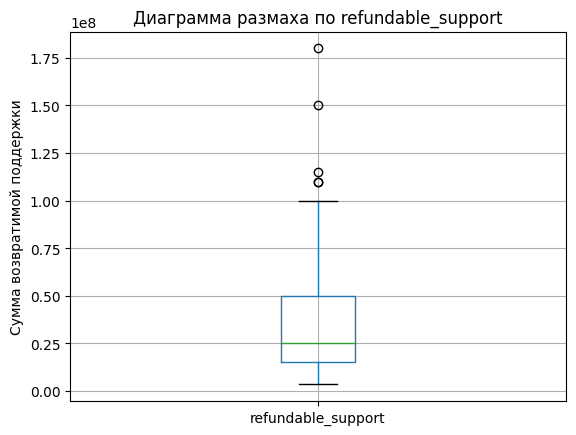

In [ ]:
data.query('refundable_support > 0').boxplot(column='refundable_support')
plt.title('Диаграмма размаха по refundable_support')
plt.ylabel('Сумма возвратимой поддержки')
plt.show()

Сильно выбивается четыре максимальных значения, посмотрим, как это выглядит в таблице.

In [ ]:
data.sort_values('refundable_support', ascending=False).head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...","россия, китай",о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,фонд кино,5.80,"приключения,фэнтези",333597059.59
3350,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,художественный,"ооо ""нон-стоп продакшн""",россия,а.мизгирев,"а.роднянский, с.мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,фонд кино,6.60,драма,364285139.60
6471,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25
3163,Герой (2015),111000416,2016-01-22 12:00:00+00:00,художественный,"ооо ""студия 25"", ооо ""медиа арт студио"", ооо ""...",россия,ю.васильев,"э.айнулова, н.дорошкевич, м.журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"министерство культуры, фонд кино",7.10,"мюзикл,боевик,драма",81430626.82


**Промежуточный итог:** В данных колонках присутсвуют аномальные значения, но здесь мы видим все колонки с поддержкой, колонку бюджета,  а также сборы. Стоит отметить оценки таких фильмов - оценки не выглядят аномальными, также в спонсорах везде фигурирует "Фонд кино". Необходимо рассмотреть аномальные значения в контексте всех колонок с поддержкой.

#### Рассмотрим аномальные значения в колнке `refundable_support`

Сводная статистика колонки

In [ ]:
data.query('nonrefundable_support > 0')['nonrefundable_support'].describe()

count         323.00
mean     50345784.25
std      60243206.31
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      45000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64

Убрал значения, где поддержка равна 0. В статистике так же видно, что средняя сильно отличается от медианы. Оценим диаграмму размаха.

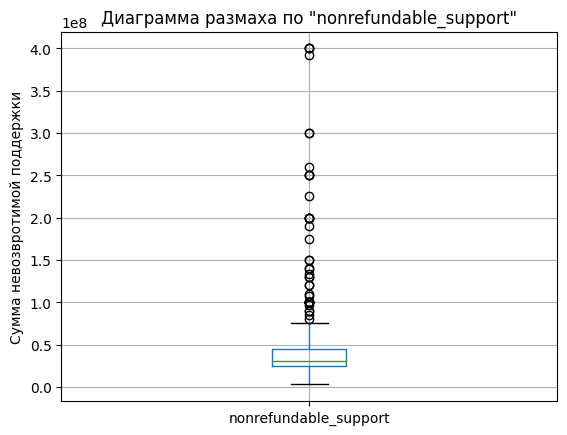

In [ ]:
data.query('nonrefundable_support > 0').boxplot(column='nonrefundable_support')
plt.title('Диаграмма размаха по "nonrefundable_support"')
plt.ylabel('Сумма невозвротимой поддержки')
plt.show()

Здесь видим уже два выбивающихся значения, но не думаю, что это те же строки, которые были выведены по колонке `refundable_support`. Для убеждения выведем строки с выбивающимися значениями.

In [ ]:
data.sort_values('nonrefundable_support', ascending=False).head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,фонд кино,5.70,"фантастика,боевик",NaN
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,фонд кино,6.00,"история,биография,драма",717703185.53


**Промежуточный итог:** Совсем другие строки, которых не было в аномальных значениях по колонке `refundable_support`, но здесь тоже спонсором выступает "Фонд кино", а также даты выходов фильмов довольно свежие (2019 год - последний год по выходам, представленный в таблице). Думаю, для контекста необходимо проверить данные в колонке `budget`. После чего можно принять решение, что делать с данными аномалиями.

#### Рассмотрим колонку `budget`

Сводная статистика колонки

In [ ]:
data.query('budget > 0')['budget'].describe()

count          315.00
mean     134096082.35
std      191226039.63
min       14462464.00
25%       46153866.50
50%       73379554.00
75%      150004286.50
max     2305074303.00
Name: budget, dtype: float64

Убрал значения, где поддержка равна 0. Средняя сильно отличается от медианы. Посмотрим на диаграмму размаха.

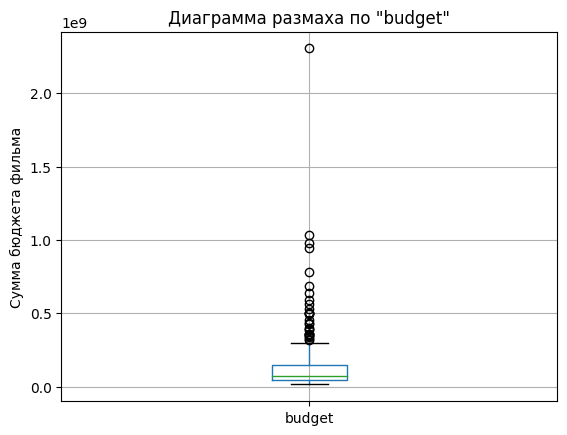

In [ ]:
data.query('budget > 0').boxplot(column='budget')
plt.title('Диаграмма размаха по "budget"')
plt.ylabel('Сумма бюджета фильма')
plt.show()

Здесь видим только одно сильно выбивающееся значение. Посмотрим, как это выглядит в таблице.

In [ ]:
data.sort_values('budget', ascending=False).head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...","россия, китай",о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,фонд кино,5.80,"приключения,фэнтези",333597059.59


**Промежуточный итог:** тот же фильм, что мы увидели в аномальных значениях в колонке `refundable_support`. Однако в аномальных значениях по колонке `refundable_support` данный фильм был единственный, который выпущен в последний год по таблице (2019 год - последний год по выходам фильмов, представленный в таблице).

Стоит оценить колонку `box_office` и принять решение - удалять аномальные значения или нет.

#### Рассмотрим колонку `box_office`

Статистика по колонке

In [ ]:
data.query('box_office > 0')['box_office'].describe()

count         3134.00
mean      77064365.82
std      241178383.77
min             40.00
25%         101028.75
50%        2409099.35
75%       24569794.87
max     3073568690.79
Name: box_office, dtype: float64

Убрал значения, где поддержка равна 0. И тут большое различие медианы и среднего значения. Рассмотрим диаграмму размаха.

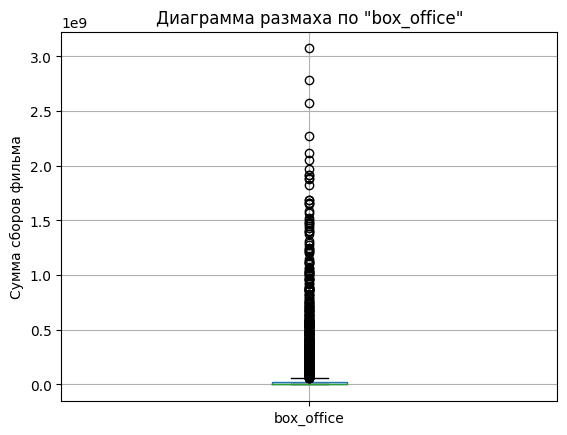

In [ ]:
data.query('box_office > 0').boxplot(column='box_office')
plt.title('Диаграмма размаха по "box_office"')
plt.ylabel('Сумма сборов фильма')
plt.show()

Выбиваются 4 значения. Рассмотрим всю таблицу с такими значениями.

In [ ]:
data.sort_values('box_office', ascending=False).head(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,к.шипенко,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,фонд кино,6.80,комедия,3073568690.79
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,а.мегердичев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,0.00,400000000.00,590192191.00,фонд кино,7.50,"спорт,драма",2779686144.00
6819,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,художественный,марвел студиос,сша,"джо руссо, энтони руссо",кевин фейги,«16+» - для детей старше 16 лет,0.00,0.00,0.00,коммерческий проект,7.60,"фантастика,боевик,драма",2576613776.83
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,художественный,"ооо ""кинокомпания марс-фильм"" по заказу ооо ""м...",россия,а.сидоров,"а.златопольский, р.дишдишян, л.блаватник, н.яр...",«12+» - для детей старше 12 лет,60000000.00,120000000.00,563784717.00,фонд кино,6.50,"драма,военный,боевик",2271754004.52


**Промежуточный итог:** Абсолютно другие фильмы, которые мы еще не встречали в аномальных значениях. Стоит отметить, что оценки у таких фильмов высокие (если сравнивать с остальными аномальными значениями). И выпущены такие фильмы в последние годы датасета - с 2017 по 2019 годы.

**Вывод:** Рассмотрел количественные колонки `refundable_support`, `nonrefundable_support`, `budget`, `box_office` на наличие аномальных значений.

Действительно, аномальные значения по суммам присутствуют, но надо ли их удалять? Не думаю, потому что все эти данные могут пригодиться для дальйшего анализа, а если их удалять, то они могут существенно изменить картину анализа.

1. Отвечу на вопрос "Почему не удаляю аномальные значения?":
    - Так как мы увидели колонки в большинстве 2019 года, в то время как данные представлены с 2010 года по 2019 год. Это может говорить нам о том, что за это время могло много измениться в ценовой политике в киноиндустрии (инфляция, ослабления рубля и тд.);
    - В аномальных колонках в спонсорах везде фигурирует "Фонд кино", похоже на правду, так как Фонд кино является крупшейшим спонсором в России;
    - Оценки выглядят правдивыми. У фильмов с максимальными сборами оценки выше, чем у остальных фильмов с аномальными значениями, в то время как у остальных аномальных фильмов значения оценок близки к правде (оценки находятся на уровне 6-6.5).


2. Отвечу на вопрос "С чем связаны аномальные значения?":
    - Как и написал ранее, с возможной инфляцией, которая могла сильно изменить суммы на рынке киноиндустрии;
    - Споносор Фонд кино - крупнейший спонсор государства, который может позволить себе "эксперименты", а также проспонсировать необходимой суммой фильмы, так как свой бюджет у фильма может быть минимальным;
    - В то же время фильмы с большим общим бюджетом на самом деле могут быть фильмами, на которых поставла высокая цель и могут иметь такой бюджет
    - Фильмы с аномальными значения сборов действительно могут иметь данные сборы. Об этом говорят нам оценки фильмов.

### Рассмотрим данные в колонке `budget` в отношении с колонками `refundable_support` и `nonrefundable_support`, так как они зависят друг от друга

#### Рассмотрим случай, при котором в колонке `budget` нет суммы, а в других колонках есть

In [ ]:
ratio_budget_zero = round(data.query('budget == 0 and (refundable_support > 0 or nonrefundable_support > 0)')['puNumber'].count()
      / data['puNumber'].count(),3)*100
#считаю процент таких значений от всей таблицы
display(f'Процент строк без данных бюджета, но с данными господдержки составляет: {ratio_budget_zero}%')

display(data.query('budget == 0 and (refundable_support > 0 or nonrefundable_support > 0)'))
#интересно, что такие значения вообще есть

'Процент строк без данных бюджета, но с данными господдержки составляет: 0.2%'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"министерство культуры, фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,фонд кино,5.60,фантастика,1038321489.00


**Промежуточный итог:** интересно, что такие значения все-таки есть, и они составляют 0.2% от всей таблицы. Бюджет фильма указан как 0, в свою очередь у фильмов есть государственная поддержка. Стоит выявить общую долю поддержки от бюджета во всей таблице и заполнить такие данные на основании доли, которую получим.

#### Применим медианное значение для заполнения бюджетов, равные нулю, но с информацией о государственном финансировании

Посчитаем долю государственной поддержки в процентах

In [ ]:
gos_sup = round(((data['nonrefundable_support'] + data['refundable_support']) / data['budget']).median(),2)

display(f'Медиана доли государственной поддержки: {gos_sup*100}%')

'Медиана доли государственной поддержки: 61.0%'

Медианное значение доли от общего бюджета, которая занимает государственная поддрежка, составляет 61%. Применим наше значение для того, чтобы заполнить нулевой бюджет.

In [ ]:
#решил написать функцию, которая определит значения с нашим условием и заменит на нужные суммы

def replace_bud(df, coef):
    condition = (df['budget'] == 0) & ((df['nonrefundable_support'] > 0) | (df['refundable_support'] > 0))
    #формирую отдельно табличку с моим условием

    df.loc[condition, 'budget'] = (df['nonrefundable_support'] + df['refundable_support']) / coef
    #меняю значения из таблички в колонке budget на долю поддержки от всего бюджета

    return data


data = replace_bud(data, gos_sup)

data.query('puNumber in [111017315,111003314,111009615,111004213,111022019]')
#вывожу 5 строк для убеждения, что все посчиталось корректно

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,министерство культуры,NaN,NaN,28140.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,фонд кино,5.30,"комедия,фантастика",19957031.50
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,131147540.98,фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,32786885.25,фонд кино,6.20,"комедия,фэнтези",67418974.80
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,фонд кино,6.00,"история,биография,драма",717703185.53


**Промежуточный итог:** были выявлены значения в таблице, при которых в колонке `budget` значения составляли 0, при этом данные с государственной поддержкой были заполнены суммами. Принял решение заполнить такие данные в колонке `budget` долей поддержки от всего бюджета (медианным значением) в целом в таблице.

#### Рассмотрим случай, при котором в колонке budget сумма меньше, чем в сумме колонок с государственной поддержкой

In [ ]:
data.query('budget < (refundable_support + nonrefundable_support)')
#видимо, в пункте 3.6.1 такие случаи исключил

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Промежуточный итог:** в таблице нет значений, где бюджет фильма был бы меньше государственной поддержки.

**Вывод:** в таблице была выявлена интересная ситуация: не было данных по бюджету фильма, но были данные по его государственной поддержки. Такие значения составили 0.2% от всей таблицы и были преобразованы. Преобразовал такие значения поделив сумму поддержки на ее долю в таблицу (отдельно посчитал медиану (пункт 3.6.1)). Также проверил значения в таблице по бюджету фильма, который был бы ниже суммы поддержки, но таких значений не выявлено.

###  Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
data['y_date'] = data['show_start_date'].dt.year
#выделяю год

data.head()
#проверка

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [ ]:
def split(df,old_column):
    #создаю функцию, чтобы применить к двум колонкам сразу
    df[f'first_{old_column}'] = df[old_column].str.split(',').str[0]
    #через f-строку применяю название, методом split() разделяю значения в списке по знаку ",",
    #далее беру первое значение из списка с индексом 0
    return df

data = split(data,'director')
data = split(data,'genres')

data.head()
#проверка

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date,first_director,first_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,7.20,"боевик,драма,мелодрама",NaN,2015,кевин костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий проект,6.60,"драма,военный",NaN,2016,е.матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2016,тимур бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий проект,6.80,"фантастика,боевик,триллер",NaN,2015,тимур бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
data['ratio_gos_sup'] = round(((data['refundable_support']+data['nonrefundable_support'])/data['budget'])*100,2)
#считаю долю для каждой картины, считаю в процентах

data.sort_values('refundable_support',ascending=False).head()
#проверка

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date,first_director,first_genres,ratio_gos_sup
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...","россия, китай",о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,фонд кино,5.80,"приключения,фэнтези",333597059.59,2019,о.степченко,приключения,11.71
3350,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,художественный,"ооо ""нон-стоп продакшн""",россия,а.мизгирев,"а.роднянский, с.мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,фонд кино,6.60,драма,364285139.60,2016,а.мизгирев,драма,65.77
6471,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25,2018,к.бронзит,мультфильм,61.99
3163,Герой (2015),111000416,2016-01-22 12:00:00+00:00,художественный,"ооо ""студия 25"", ооо ""медиа арт студио"", ооо ""...",россия,ю.васильев,"э.айнулова, н.дорошкевич, м.журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"министерство культуры, фонд кино",7.10,"мюзикл,боевик,драма",81430626.82,2016,ю.васильев,мюзикл,63.01
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,художественный,"ооо ""тпо ""рок"", ооо ""матильда""",россия,а.учитель,"а.учитель, а.достман, в.винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00,2017,а.учитель,фэнтези,29.04


**Вывод:** в таблицу были добавлены новые столбцы:
- год премьеры фильма;
- главный режиссёр (исходя из первого режиссера в списке);
- главный жанр (исходя из первого жанра в списке);
- доля государственной поддержки в процентах для каждого фильма.

**Подведем итоги предобработки данных:**
выполнил следующие шаги:
1. Первичная предобработка данных:
    - изменил типы данных в колонках в соответствии с замечаниями;
    - соединил таблицы **movies** и **shows**.
2. Обработка пропусков и дубликатов в колонках:
    - обработал пропуски там, где это было возможно (в основном в количественных данных - все, что связано с бюджетом)
    - обработал возможные дубликаты в колонках: значения во множестве колонок на данный момент написаны строчными буквами; убрал лишние пробелы в начале и в конце строки; убрал дефисы в колонке `production_country`, заменив на запятые.
3. Обработка дубликатов по таблице:
    - отдельно нашел и проанализировал дубликаты по колонкам с одинаковым прокатным номером; одинаковым наименованием фильма; одинаковыми наименованиями фильма и датой;
    - считаю, что такие данные надо оставить, так как они могут понадобиться в последующем анализе;
    - полных дубликатов (полностью одинаковых строк) найдено не было.
4. Обработка колонки `budjet`:
    - выявил случай, при котором бюджет был равен нулю, но данные по государственной поддержке были заполнены - такие значения были заполнены медианной долей государственной поддержки от бюджета по всей таблице;
5. Добавление новых колонок:
    - добавлена колонка года выхода фильма;
    - добавлена колонка с именем главного режиссера;
    - добавлена колонка с наименованием главного жанра;
    - добавлена колонка с долей государственной поддержки фильма в зависимости от его бюджета.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, обобщили анализ и предобработку данных.</font>

## Проведите исследовательский анализ данных


### Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

#### Количество прокатов фильмов по годам

,count
,box_office
y_date,
2010,101
2011,109
2012,123
2013,179
2014,273
2015,462
2016,525
2017,357


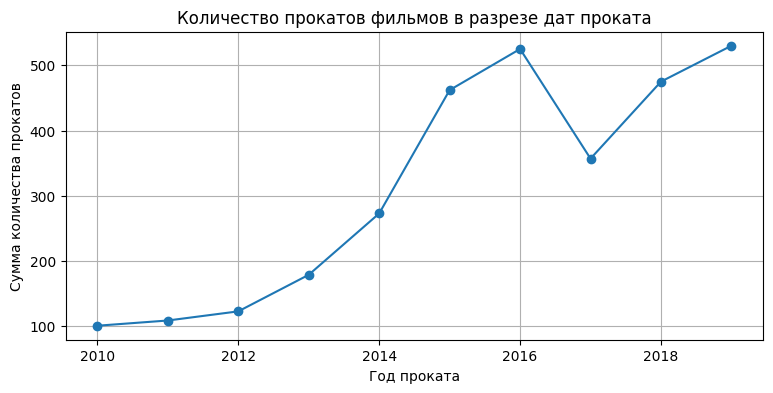

In [ ]:
display(data
 .query('box_office > 0')
 .pivot_table(index='y_date', values='box_office', aggfunc=['count']))

(data
 .query('box_office > 0')
 .pivot_table(index='y_date', values='box_office', aggfunc=['count'])
 .plot(xlabel='Год проката', ylabel='Сумма количества прокатов', title='Количество прокатов фильмов в разрезе дат проката', legend=False, style='o-',figsize=(9,4),grid=True))
plt.show()
#сборы больше нуля, тк именно это дает данные о прокате

**Подведем промежуточный итог:** начиная с 2010 и заканчивая по 2016 год можем увидеть, что прокат фильмов только увеличивался с большими темпами.

Рассмотрим интересные моменты на графике:
- с 2013 года по 2014 год прокат увеличился на ~50%;
- с 2014 года по 2015 год прокат увеличился еще на ~65%;
- с 2015 года по 2016 год прокат, видимо, достиг своего пика и рост составил 10-12%;
- с 2016 года по 2017 год прокат уменьшился на 30%;
- далее вернулся на свой пиковый уровень.

#### Доля фильмов с указанной информацией о прокате в кинотеатрах

Для начала рассмотрим долю фильмов с указанной информацией о прокате

In [ ]:
ratio_box_office = round(data[data['box_office'] > 0]['box_office'].count()/data['title'].count(),2)*100
#делю значения где сборы больше нуля на любые значения из таблицы

display(f'По всей таблице доля фильмов с указанной информацией о прокате составляет: {ratio_box_office}%')
#вывожу строку

ratio_movies = round(data[data['box_office'] > 0].groupby('y_date')['box_office'].count()
      /data.groupby('y_date')['title'].count(),2)*100
#считаю долю фильмов с указанной информацией о прокате на всего фильмов
display(ratio_movies)

'По всей таблице доля фильмов с указанной информацией о прокате составляет: 42.0%'

y_date
2010   10.00
2011   18.00
2012   21.00
2013   28.00
2014   34.00
2015   66.00
2016   64.00
2017   71.00
2018   53.00
2019   57.00
dtype: float64

Построим график для более удобного анализа

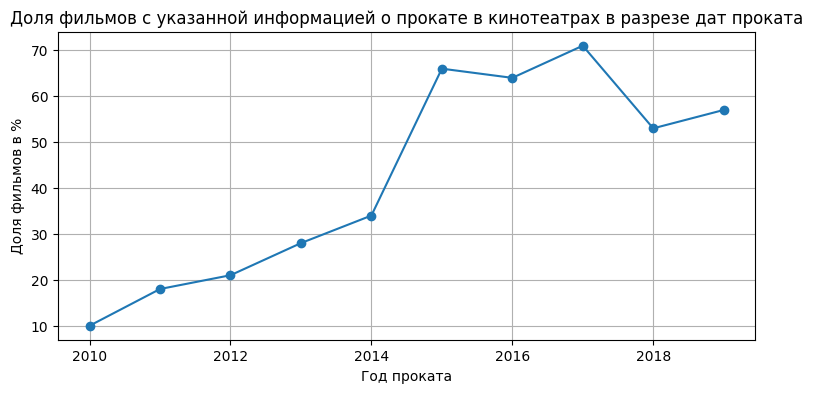

In [ ]:
ratio_movies.plot(xlabel='Год проката', ylabel='Доля фильмов в %', title='Доля фильмов с указанной информацией о прокате в кинотеатрах в разрезе дат проката', legend=False, style='o-',figsize=(9,4),grid=True)
plt.show()

**Подведем промежуточный итог:** на графике видно, что начиная с 2014 года данные о фильмах с информацией о прокате начинают расти. Так как с 2014 по 2015 год доля информации о прокатных фильмах увеличилась на 80-90%. Возможно, это связано с введением бОльшего контроля, или с тем, что с годами данные теряют свою актуальность. Пик можно увидеть в 2017 году.

### Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

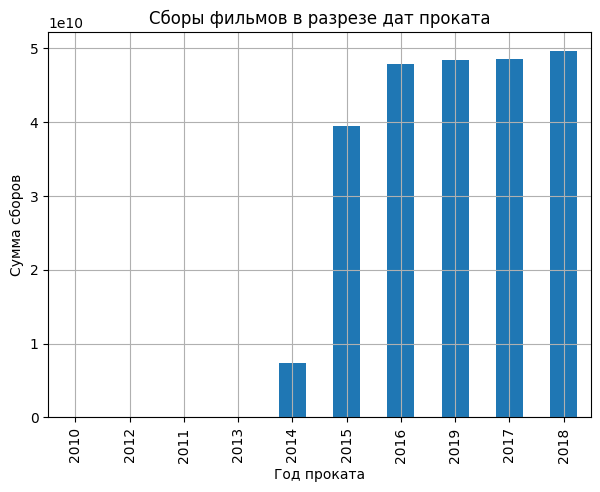

,y_date,sum
8,2018,49668403134.32
7,2017,48563707217.51
9,2019,48425708779.59
6,2016,47866299741.91
5,2015,39497365196.40
4,2014,7444951859.20
3,2013,29799706.20
1,2011,14102765.00
2,2012,6955423.00
0,2010,2428654.00


In [ ]:
sum_box_office = data.query('box_office > 0').pivot_table(index='y_date', values='box_office', aggfunc=['sum'])
#создаю сводную таблицу, где суммирую сборы по годам

sum_box_office.reset_index(inplace=True)
#у меня почему-то не переименовывались колонки, поэтому сбрасываю индексы в своей таблице

sum_box_office.columns = ['y_date','sum']
#меняю названия колонок

sum_box_office.sort_values('sum',ascending=True).plot(y='sum', x='y_date', ylabel='Сумма сборов', xlabel='Год проката', title='Сборы фильмов в разрезе дат проката', legend=False, kind='bar',figsize=(7,5),grid=True)
plt.show()
#вывожу график

display(sum_box_office.sort_values('sum',ascending=False))
#таблица в подярке возврастания сборов

**Подведем промежуточный итог:** минимальные сборы были составляют 22.4 млн рублей в 2010 году, максимальные - 49.6 млрд рублей в 2018 году. Но стоит отметить, что с 2016 по 2019 суммы сборов находятся примерно на одном и том же уровне. Ниже идут сборы в 2015 году, меньше всего на 10% по сравнению с 2016 годом. Я думаю, рост суммы сборов напрямую связан с ростом прокатов.

### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

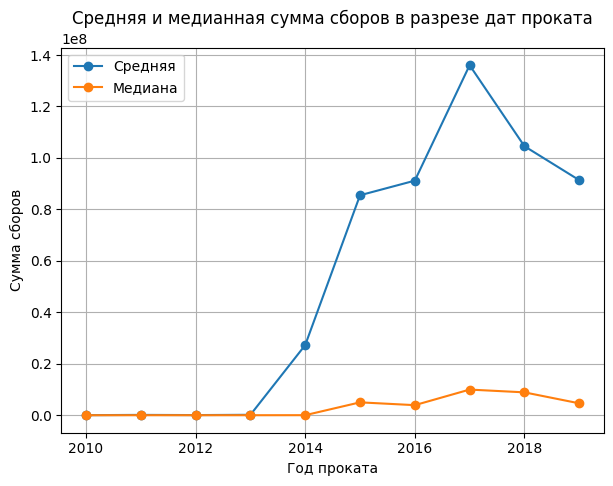

,y_date,mean,median
0,2010,24046.08,1710.00
1,2011,129383.17,3000.00
2,2012,56548.15,6220.00
3,2013,166478.81,3580.00
4,2014,27270885.93,20400.00
5,2015,85492132.46,5003450.15
6,2016,91173904.27,3915041.02
7,2017,136032793.33,9968340.00
8,2018,104565059.23,8891102.21
9,2019,91369261.85,4627798.34


In [ ]:
mean_med_box_office = data.query('box_office > 0').pivot_table(index='y_date', values='box_office', aggfunc=['mean','median'])

mean_med_box_office.reset_index(inplace=True)
#тут тоже не переименовывались колонки, поэтому сбрасываю индексы в своей таблице

mean_med_box_office.columns = ['y_date', 'mean', 'median']
#меняю названия колонок

mean_med_box_office.plot(x='y_date', xlabel='Год проката', ylabel='Сумма сборов',title='Средняя и медианная сумма сборов в разрезе дат проката', style='o-', figsize=(7,5), grid=True)
plt.legend(['Средняя','Медиана'])
plt.show()
#вывожу график

display(mean_med_box_office)
#вывожу таблицу

**Подведем промежуточный итог:** график по среднему значению примерно такой же, как и график по количеству прокатов, например, в части пика - 2017 год, в части активного роста - начиная с 2014 года. Стоит отметить, что медиана и средняя сильно отличаются. Думаю, это связано со слишком "успешными" картинами, которая могла собрать большую сумму и наоборот.

### Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

#### Минимальная и максимальная сумма сборов в разрезе возврастных ограничений

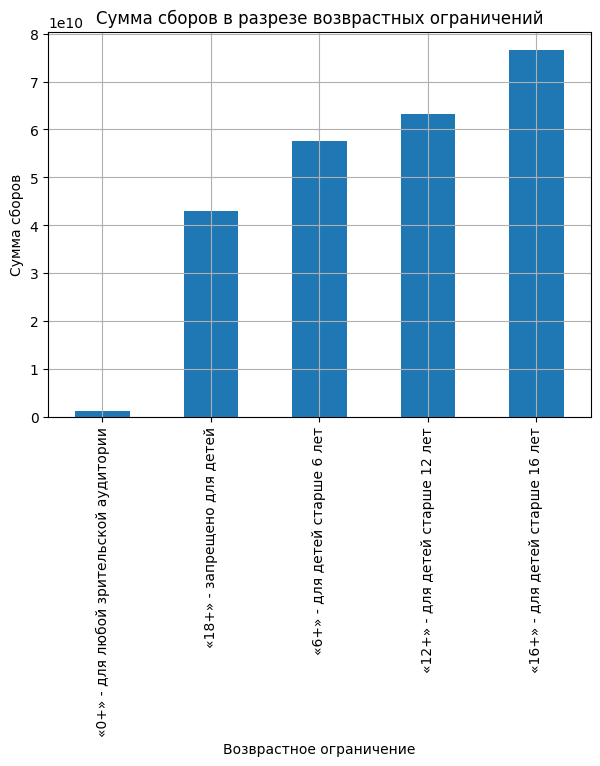

,age,sum
2,«16+» - для детей старше 16 лет,76583674040.93
1,«12+» - для детей старше 12 лет,63225588059.83
4,«6+» - для детей старше 6 лет,57530728855.08
3,«18+» - запрещено для детей,42974727569.62
0,«0+» - для любой зрительской аудитории,1205003951.67


In [ ]:
age_box_office = data.query('box_office > 0').pivot_table(index='age_restriction', values='box_office', aggfunc=['sum'])

age_box_office.reset_index(inplace=True)
age_box_office.columns = ['age', 'sum']
#меняю названия колонок

age_box_office.sort_values('sum',ascending=True).plot(x='age', kind='bar',xlabel='Возврастное ограничение', ylabel='Сумма сборов', title='Сумма сборов в разрезе возврастных ограничений', legend=False, figsize=(7,5), grid=True)
plt.show()
#вывожу график

display(age_box_office.sort_values('sum',ascending=False))
#вывожу таблицу

**Промежуточный итог:** по графику и таблице видно, что наиболее "выгодные" фильмы те, что сняты для аудитории от 12+ до 16+. Менее кассовый формат - 0+.

#### Суммы сборов в разрезе возврастных ограничений и дат проката

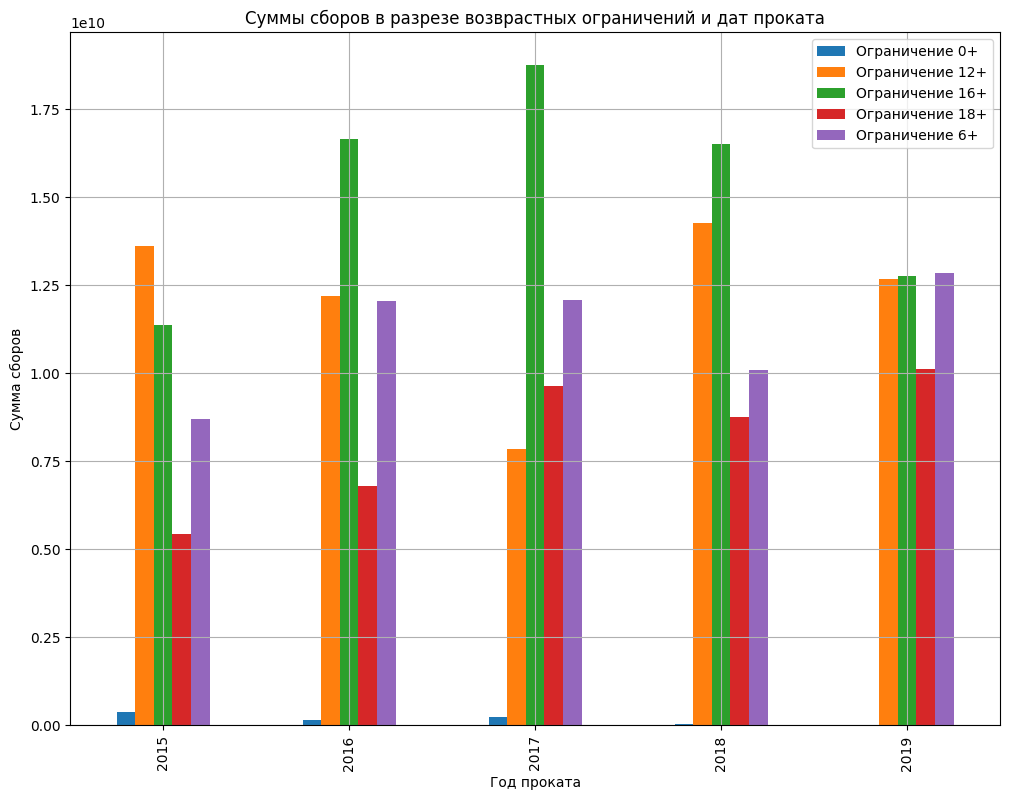

sum  \
age_restriction «0+» - для любой зрительской аудитории   
y_date                                                   
2015                                      379054578.37   
2016                                      150228848.67   
2017                                      229598930.00   
2018                                       32449002.11   
2019                                       17746066.82   

                                                 \
age_restriction «12+» - для детей старше 12 лет   
y_date                                            
2015                             13616082008.91   
2016                             12204446524.39   
2017                              7851427660.67   
2018                             14267291660.69   
2019                             12680198773.67   

                                                                             \
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
y_date                                                                        
2015                             11368120870.27               5432308367.44   
2016                             16664548541.74               6793929818.87   
2017                             18745042900.06               9651495581.02   
2018                             16503602346.96               8760085501.15   
2019                             12753418984.60              10121796303.64   

                                               
age_restriction «6+» - для детей старше 6 лет  
y_date                                         
2015                            8701799371.41  
2016                           12053146008.24  
2017                           12086142145.76  
2018                           10104974623.41  
2019                           12852548650.86

In [ ]:
age_sum_box_office = (data
                      .query('box_office > 0 and y_date >= 2015')
                      .pivot_table(index='y_date', columns='age_restriction', values='box_office',aggfunc=['sum']))

age_sum_box_office.plot(xlabel='Год проката', ylabel='Сумма сборов', title='Суммы сборов в разрезе возврастных ограничений и дат проката', kind='bar',figsize=(12,9),grid=True)
plt.legend(['Ограничение 0+','Ограничение 12+','Ограничение 16+','Ограничение 18+','Ограничение 6+'])
plt.show()
display(age_sum_box_office)

**Промежуточный итог:** если смотреть в разрезе и дат, и возврастных ограничений, то можно увидеть тренд по снижению преобладания ограничения в 16+. А именно, начиная с 2017 года сборы становятся равными между ограничениями в 16+, 12+ и 6+. Думаю, это связано с перенасыщением рынка для возврастных ограничений в 16+ и 12+, так как именно они в какой-то момент были лидирующими. А также с поиском ниши для создания новых картин - в частности для 6+ и 18+, так как в 2019 можем увидеть одинаковые сборы у 16+, 12+, 6+, а ограничения для 18+ примерно на 20% ниже остальных.

**Общий вывод:**

Провел исследовательский анализ данных по сборам картин, а именно:
1. Анализ по количеству фильмов с указанной информацией о прокате:
    - было выявлено высокий рост между 2013 годом и 2016 годом. с 2013 по 2015 рост картин составил 50%, а с 2014 по 2016 - рост 65%, пик роста произошел в 2016 году;
    - как рост картин по годам, увеличилась доля фильмов в прокате.
2. Анализ максимума и минимума сборов:
    - пик сборов произошел в 2018 году. Сумма составила 49.6 млрд рублей;
    - стоит отметить, что с 2016 года по 2019 различия в разрезе данных дат были малыми. Разница составила менее 2-3%;
    - минимальные сборы составили - 22.4 млн рублей в 2010 году;
    - думаю, такое большой разрыв быть связан с минимальным количеством выпущенных в прокат фильмов, а также инфляцией.
3. Средняя и медиана по сборам:
    - средняя показала нам примерно такой же график, что и по количеству выпущенных в прокат фильмов. Можно сделать вывод о том, что больше фильмов - больше сборы;
    - медиана, наоборот, показала минимальные значения. Это может говорить о том, что в данных есть возможные отклонения в сборах, связанных с высокой популярностью фильмов и такими же высокими сборами;
4. Анализ в разрезе возврастных ограничений:
    - без разреза по датам можно сказать, что преобладающий тип ограничения по сборам - 16+, однако разница всего в 5-10% от следующего за ним по сборам ограничения - 12+. Также и с ограничиями в 6+ и 18+. Все ограничения по кассовым сборам различаются между собой на 5-10%, кроме 0+ - по нему самые низкие сборы;
    - с разрезом по датам мы видим другую картину: начиная с 2017 отличия в кассовых сборах снижаются для ограничений в 16+, 12+ и 6+, видимо, распределяя кассовые сборы между собой. Отличается только 18+, который ниже по кассовым сборам на 20% от других форматов, а также 0+, у которого все так же меньше всего сборов;
    - после анализа графика в разере дат, делаю вывод о том, что фильмы с ограничением в 16+ достигли своего пика, и произошел уклон в более "непопулярные" по сборам ниши, что и видно на графике в 2019 году.

## Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Для начала создам таблицу с фильмами с государственной поддержкой и информацией об их пракате

In [ ]:
data_gos = data.query('financing_source != "коммерческий проект" and box_office > 0')
#создаю отдельную таблицу

data_gos.head(10)
#первые десять строк

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date,first_director,first_genres,ratio_gos_sup
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,министерство культуры,8.10,"драма,мелодрама",365353.60,2013,а.атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,министерство культуры,NaN,NaN,28140.00,2014,а.якимчук,NaN,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,фонд кино,5.30,"комедия,фантастика",19957031.50,2013,р.давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,министерство культуры,4.20,драма,55917.50,2014,е.миндадзе (псевдоним катя шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,министерство культуры,6.40,драма,232100.00,2014,м.угаров,драма,62.48
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,анимационный,"ооо ""студия ""мастер-фильм""",россия,с.серегин,а.герасимов,«6+» - для детей старше 6 лет,0.00,25000000.00,51850000.00,министерство культуры,6.10,"мультфильм,фэнтези,история",15078858.60,2015,с.серегин,мультфильм,48.22
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,р.давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,фонд кино,8.50,"драма,военный,история",249166767.70,2015,р.давлетьяров,драма,68.00
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,художественный,"ооо ""продюсерский центр ""хорошо продакшн"", rez...","россия, франция, латвия",в.глаголева,н.иванова,«12+» - для детей старше 12 лет,0.00,46502299.00,86210067.00,"министерство культуры, фонд кино",6.70,драма,4731239.50,2014,в.глаголева,драма,53.94
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,художественный,"ооо ""водород 2011""",россия,а.войтинский,с.сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,а.войтинский,триллер,53.74
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,художественный,"ооо ""кинокомпания ""ракурс""",россия,д.федоров,в.сидоренко,«16+» - для детей старше 16 лет,0.00,34000000.00,48571430.00,министерство культуры,7.40,"фэнтези,приключения,драма",51907.50,2015,д.федоров,фэнтези,70.00


### Для начала рассмотрим количество выпущенных фильмов с государственной поддержкой

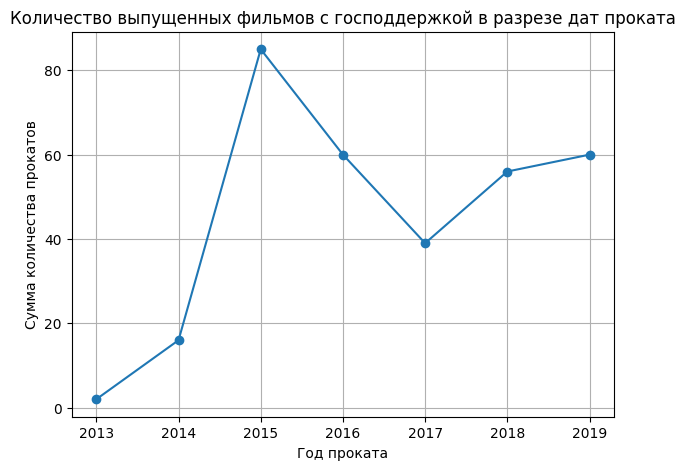

In [ ]:
(data_gos.pivot_table(index='y_date', values='box_office', aggfunc=['count']))
(data_gos
 .pivot_table(index='y_date', values='box_office', aggfunc=['count'])
 .plot(xlabel='Год проката', ylabel='Сумма количества прокатов', title='Количество выпущенных фильмов с господдержкой в разрезе дат проката', legend=False, style='o-',figsize=(7,5),grid=True))
plt.show()

**Промежуточный итог:** на графике виден резкий рост по количеству фильмов с 2014 года по 2015 год (пик) - рост составил 400%. Но к 2017 году виден спад - примерно на 200%. Данный график очень схож с графиком, который был построен по всем фильмам в таблице (пункт 4.1.1.). Продолжим изучение в разрезе нескольких лет.

### Сумма сборов фильмов с государственной поддержкой

,sum
,box_office
y_date,
2013,20322385.10
2014,1017422166.60
2015,5785285418.14
2016,6081707839.10
2017,10865075300.96
2018,9934069010.25
2019,8409627454.63


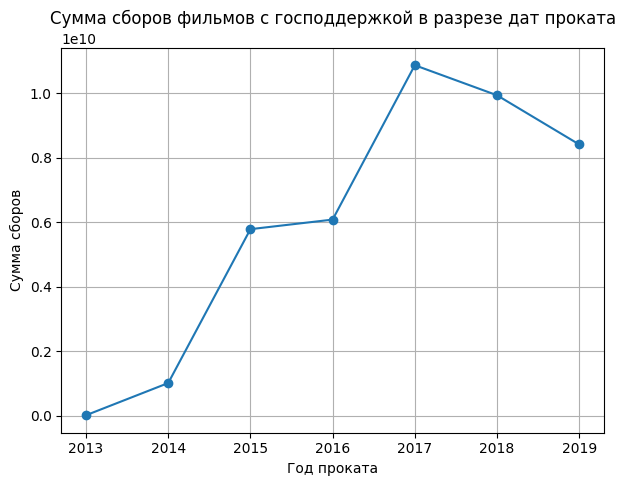

In [ ]:
display(data_gos.pivot_table(index='y_date', values='box_office', aggfunc=['sum']))

(data_gos
 .pivot_table(index='y_date', values='box_office', aggfunc=['sum'])
 .plot(xlabel='Год проката', ylabel='Сумма сборов', title='Сумма сборов фильмов с господдержкой в разрезе дат проката', legend=False, style='o-',figsize=(7,5),grid=True))
plt.show()

**Промежуточный итог:** Видим аналогичный рост суммы сборов с 2014 года по 2016 год. На данном графике интересно то, что пик по сумме сборов составил в 2017 году, когда фильмов было выпущено меньше.

### Анализ жанров

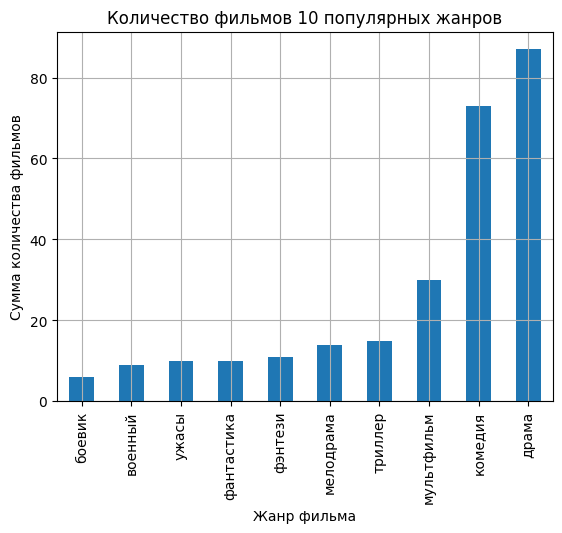

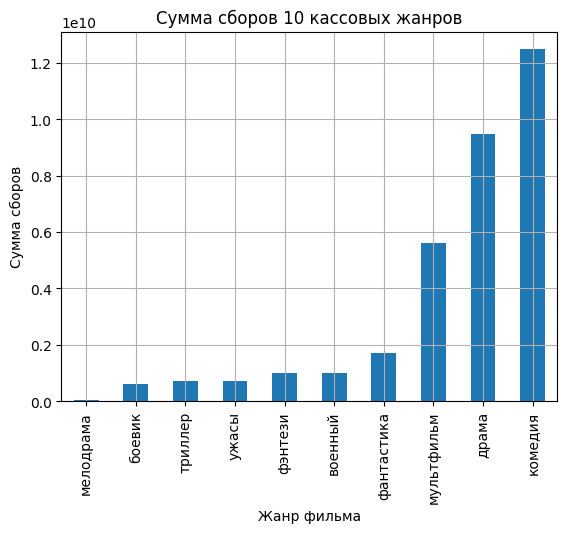

,genre,count,sum
5,драма,87,9490844101.04
7,комедия,73,12479977454.33
10,мультфильм,30,5622014134.66
16,триллер,15,700450190.14
9,мелодрама,14,54788966.23
19,фэнтези,11,995836607.97
17,ужасы,10,710123189.35
18,фантастика,10,1718204279.39
2,военный,9,1017670471.80
1,боевик,6,595928934.50


In [ ]:
most_genres_data = data_gos.pivot_table(index='first_genres',values='box_office',aggfunc=['count','sum'])
#создаю новую табличку

most_genres_data.reset_index(inplace=True)
most_genres_data.columns = ['genre', 'count','sum']
#меняю названия колонок

most_genres_data = most_genres_data.sort_values('count',ascending=False).head(10)
#выделяю первые десять по количеству картин

(most_genres_data
 .sort_values('count',ascending=True)
 .plot(y='count',x='genre', ylabel='Сумма количества фильмов', xlabel='Жанр фильма', title='Количество фильмов 10 популярных жанров', legend=False, kind='bar',grid=True))
plt.show()

(most_genres_data
 .sort_values('sum',ascending=True)
 .plot(y='sum',x='genre', ylabel='Сумма сборов', xlabel='Жанр фильма', title='Сумма сборов 10 кассовых жанров', legend=False, kind='bar',grid=True))
plt.show()

display(most_genres_data)

**Промежуточный итог:**

Наименьшее количество фильмов у жанров "боевик", "военный". В свою очередь можем увидеть, что популярными жанрами являются "драма" и "комедия". Можно предположить, что данные жанры хорошо подходят для возврастного ограничения 16+ (самые высокие сборы в прокате).

Также стоит отметить, что жанры "драма", "комедия", "мультфильмы" являются не только наиболее популярными жанрами, но и кассовыми.

### Анализ режиссеров

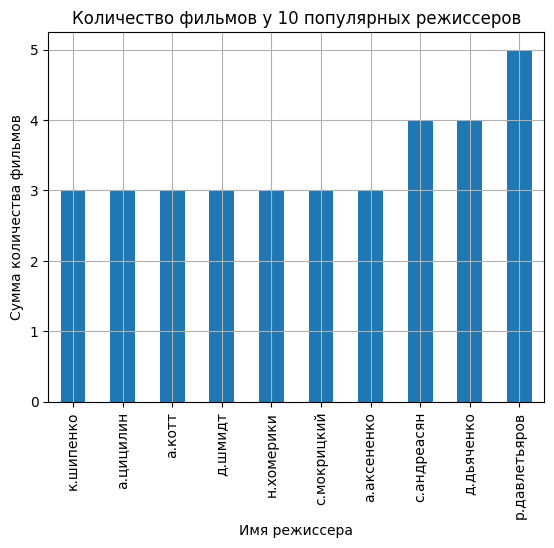

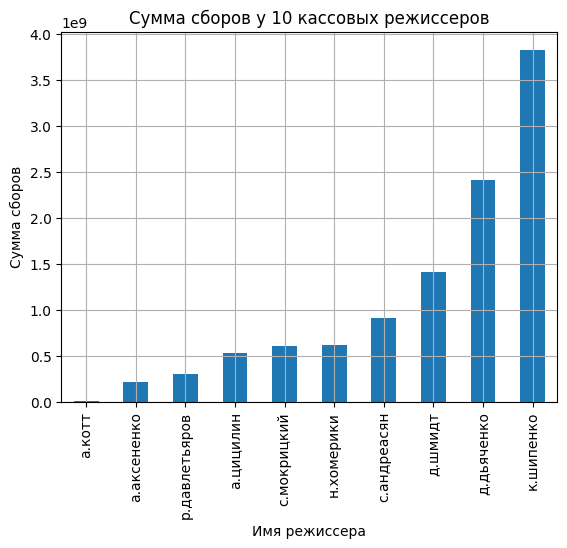

,dir,count,sum
205,р.давлетьяров,5,299262932.44
213,с.андреасян,4,910430198.34
93,д.дьяченко,4,2404898634.12
154,к.шипенко,3,3827772217.79
62,а.цицилин,3,530325949.25
28,а.котт,3,3473035.23
104,д.шмидт,3,1412475637.00
186,н.хомерики,3,618142950.23
218,с.мокрицкий,3,605964428.95
2,а.аксененко,3,212728819.60


In [ ]:
most_dir_data = data_gos.pivot_table(index='first_director',values='box_office',aggfunc=['count','sum'])
#создаю новую табличку

most_dir_data.reset_index(inplace=True)
most_dir_data.columns = ['dir', 'count','sum']
#меняю названия колонок

most_dir_data = most_dir_data.sort_values('count',ascending=False).head(10)
#выделяю первые десять по количеству картин

(most_dir_data
 .sort_values('count',ascending=True)
 .plot(y='count',x='dir',ylabel='Сумма количества фильмов', xlabel='Имя режиссера', title='Количество фильмов у 10 популярных режиссеров',legend=False, kind='bar',grid=True))
plt.show()

(most_dir_data
 .sort_values('sum',ascending=True)
 .plot(y='sum',x='dir',ylabel='Сумма сборов', xlabel='Имя режиссера', title='Сумма сборов у 10 кассовых режиссеров',legend=False, kind='bar',grid=True))
plt.show()

display(most_dir_data)

**Промежуточный итог:** бОльшее количество фильмо было выпущено у режиссера Давлестьярова. В то же время у режисеера Давлестьярова наименее кассовые фильмы. Самыми кассовыми фильмами являются фильмы режиссера Шипенко.

### Анализ государственной поддержки

#### Для начала рассмотрим ситуацию, при которой картины не окупились (бюджет меньше сборов)

In [ ]:
data_gos.query('budget < box_office')
#запрос: бюджет меньше сборов

round((data_gos.query('budget < box_office')['title'].count() / data_gos['title'].count())*100,2)
data_gos.query('budget < box_office')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date,first_director,first_genres,ratio_gos_sup
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,р.давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.00,100000000.00,220588394.00,фонд кино,8.50,"драма,военный,история",249166767.70,2015,р.давлетьяров,драма,68.00
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,художественный,"ооо ""водород 2011""",россия,а.войтинский,с.сельянов,«6+» - для детей старше 6 лет,0.00,75000000.00,139551503.00,фонд кино,7.00,"триллер,боевик,приключения",352804320.40,2015,а.войтинский,триллер,53.74
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,художественный,"ооо ""таббак""",россия,максим свешников,"тимур бекмамбетов, евгения аронова",«6+» - для детей старше 6 лет,26000000.00,30000000.00,80000000.00,фонд кино,5.00,"семейный,комедия",121225633.80,2014,максим свешников,семейный,70.00
2004,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,анимационный,"ооо ""визарт фильм""",россия,а.цицилин,"ооо ""визарт фильм"", ооо ""таббак""",«0+» - для любой зрительской аудитории,30000000.00,40000000.00,252489571.00,фонд кино,6.50,"мультфильм,фэнтези,приключения",313489846.50,2014,а.цицилин,мультфильм,27.72
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,122950819.67,фонд кино,6.60,драма,446163511.00,2015,р.прыгунов,драма,61.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,Верность,111009119,2019-06-13 12:00:00+00:00,художественный,"ооо ""друг друга"", ооо ""1-2-3 продакшн""",россия,н.сайфуллаева,"с.корнихин, в.федорович, е.никишов, п.лилиенфе...",«18+» - запрещено для детей,0.00,30000000.00,46300000.00,министерство культуры,6.20,драма,97637352.29,2019,н.сайфуллаева,драма,64.79
6990,Давай разведемся!,111009519,2019-06-12 12:00:00+00:00,художественный,"ооо кинокомпания ""глобус-фильм""",россия,а.пармас,"с.сельянов, к.эрнст, н.дрозд-макан",«12+» - для детей старше 12 лет,0.00,25000000.00,38000000.00,министерство культуры,5.90,комедия,103098290.54,2019,а.пармас,комедия,65.79
7452,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,анимационный,"ао ""аэроплан""",россия,"в.бедошвили, о.ужинов, и.пшонкин, д.цыбулькин","г.васильев, с.саркисов, и.попов",«6+» - для детей старше 6 лет,80000000.00,40000000.00,270000000.00,фонд кино,7.50,"мультфильм,детский,приключения",387590521.72,2019,в.бедошвили,мультфильм,44.44
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,к.шипенко,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,фонд кино,6.80,комедия,3073568690.79,2019,к.шипенко,комедия,37.50


Доля фильмов составляет 23%! Это говорит о том, что примерно каждый четвертый фильм не окупается.

Рассмотрим динамику по годам

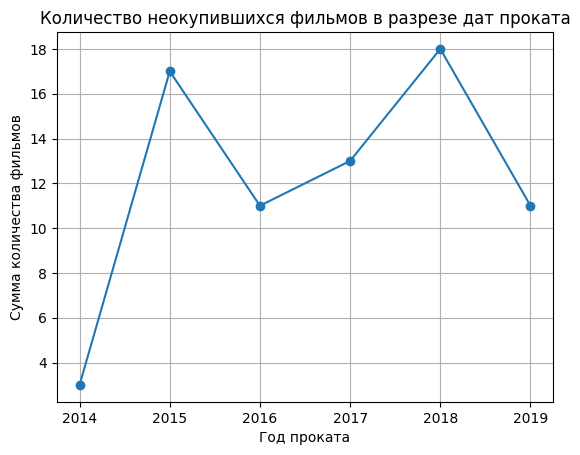

In [ ]:
(data_gos
 .query('budget < box_office')
 .pivot_table(index='y_date',values='box_office',aggfunc=['count'])
 .plot(ylabel='Сумма количества фильмов', xlabel='Год проката', title='Количество неокупившихся фильмов в разрезе дат проката', legend=False, style='o-',grid=True))
plt.show()

**Промежуточный итог:** всего доля неокупивших себя фильмов от всех фильмов (учитывая поддержку государства) составила 23%, что является довольно высокой долей (~каждый четрветрый фильм не окупается). В соответствии с этим решил посмотреть динамику по количеству "провальных" картин в разрезе дат. Можно заметить, что пиковые значения находятся в 2015 и 2018 годах, в то же время, как в анализе общей картины по всем фильмам, такие значения составляют на 10-15% меньше, чем пиковые. Возможно, именно эти фильмы и повлияли на график.

#### Добавим табличку с характеристикой акупаемости фильма

In [ ]:
#решил написать функцию, которая будет проверять значения box_office и budget
def new_df(df, budget, box_of, payback): #так как у меня несколько колонок в функции вложил одну функцую в другую
    def new_df_row(row): #проверяет значения по строке в таблице
        if row[box_of] <= row[budget]: #условия проверки
            return "окупился"
        else:
            return "не окупился"
    df[payback] = df.apply(new_df_row, axis=1) #на этом этапе добавляю новую колонку в таблицу из функции для каждой строки
    return df

data_gos = new_df(data_gos, 'budget', 'box_office', 'payback')
data_gos

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,y_date,first_director,first_genres,ratio_gos_sup,payback
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,министерство культуры,8.10,"драма,мелодрама",365353.60,2013,а.атанесян,драма,33.37,окупился
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,министерство культуры,NaN,NaN,28140.00,2014,а.якимчук,NaN,70.00,окупился
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,фонд кино,5.30,"комедия,фантастика",19957031.50,2013,р.давлетьяров,комедия,61.27,окупился
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,министерство культуры,4.20,драма,55917.50,2014,е.миндадзе (псевдоним катя шагалова),драма,69.01,окупился
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,министерство культуры,6.40,драма,232100.00,2014,м.угаров,драма,62.48,окупился
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,Тварь,111019419,2019-11-26 12:00:00+00:00,художественный,"ооо ""сок""",россия,о.городецкая,"п.зарукин, о.филипук, ф.ламшин, м.абрамов, н.т...",«16+» - для детей старше 16 лет,5000000.00,35000000.00,78422212.00,фонд кино,5.00,"триллер,драма",18617156.96,2019,о.городецкая,триллер,51.01,окупился
7452,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,анимационный,"ао ""аэроплан""",россия,"в.бедошвили, о.ужинов, и.пшонкин, д.цыбулькин","г.васильев, с.саркисов, и.попов",«6+» - для детей старше 6 лет,80000000.00,40000000.00,270000000.00,фонд кино,7.50,"мультфильм,детский,приключения",387590521.72,2019,в.бедошвили,мультфильм,44.44,не окупился
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,к.шипенко,"э.илоян, д.жалинский, в.дусмухаметов, т.бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,фонд кино,6.80,комедия,3073568690.79,2019,к.шипенко,комедия,37.50,не окупился
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,фонд кино,6.00,"история,биография,драма",717703185.53,2019,а.кравчук,история,51.02,окупился


**Промежуточный итог:** добавил в таблицу новую колонку `payback`. В колонке находятся значения "окупился", если бюджет ниже сборов; "не окупился", если бюджет выше сборов.

#### Расммотрим распределение картин по окупаемости в разере дат

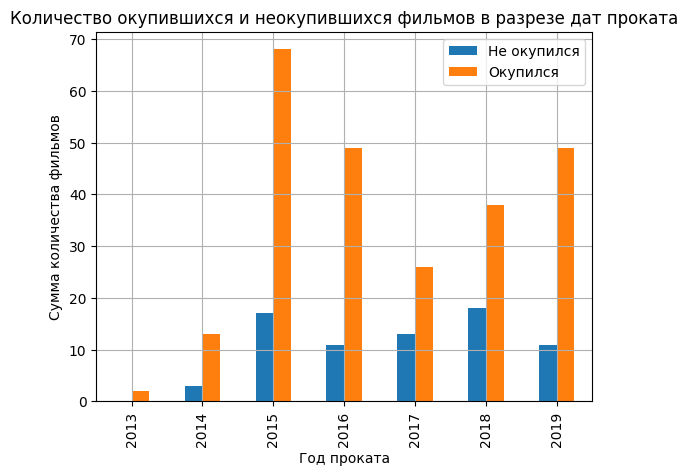

In [ ]:
(data_gos
 .pivot_table(index='y_date',columns='payback', values='box_office', aggfunc=['count'])
 .plot(xlabel='Год проката', ylabel='Сумма количества фильмов', title='Количество окупившихся и неокупившихся фильмов в разрезе дат проката', kind='bar',grid=True))
plt.legend(['Не окупился','Окупился'])
plt.show()

**Промежуточный итог:** Примерно 70-80% фильмов с государтсвенной поддержкой в каждом году окупаются в разрезе по датам.

### Причины по низкой окупаемости фильмов с поддержкой государства

В предыдщуем пункте (шаг 3.6.3.) была выявлена большая большая доля фильмов с государственной поддержкой, которые не окупаются. Попробуем ответить на вопрос "Почему четвреть спонсируемых фильмов не окупаются?".

#### Распределние фильмов по оценкам

'Средняя оценка фильмов с государственной поддержкой составляет: 6.02'

mean         
payback не окупился окупился
y_date                      
2013            NaN     6.70
2014           5.83     6.05
2015           6.45     6.06
2016           5.75     5.63
2017           6.12     5.92
2018           5.92     6.04
2019           6.44     6.18

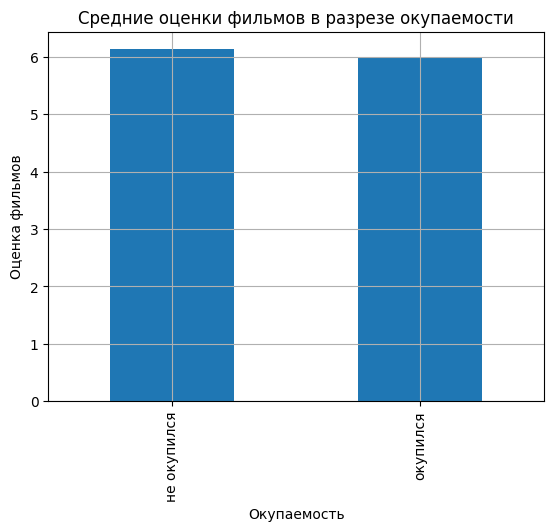

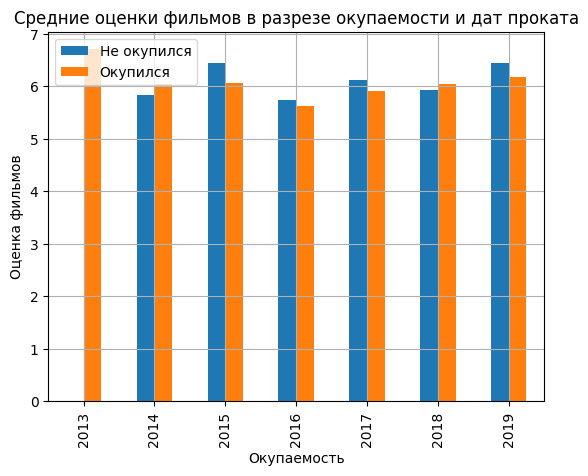

In [ ]:
avg_rating_gos = round(data_gos['ratings'].mean(),2)
display(f'Средняя оценка фильмов с государственной поддержкой составляет: {avg_rating_gos}')
display(data_gos.pivot_table(index='y_date',columns='payback', values='ratings', aggfunc=['mean']))
#средняя оценка + таблица в разрере с датами

(data_gos
 .pivot_table(index='payback', values='ratings', aggfunc=['mean'])
 .plot(xlabel='Окупаемость', ylabel='Оценка фильмов', title='Средние оценки фильмов в разрезе окупаемости', legend=False, kind='bar',grid=True))
plt.show()
#без даты

(data_gos
 .pivot_table(index='y_date',columns='payback', values='ratings', aggfunc=['mean'])
 .plot(xlabel='Окупаемость', ylabel='Оценка фильмов', title='Средние оценки фильмов в разрезе окупаемости и дат проката', kind='bar',grid=True))
plt.legend(['Не окупился','Окупился'])
plt.show()
#в разрезе дат

**Промежуточный итог:** на графике видно, что оценки находятся на одном уровне - средней оценке 6. Такие данные не дают нам оценить ситуацию в киноиндустрии.

#### Сравнение оценок между фильмами с государственной поддержкой и без

'Средняя оценка фильмо исключительно без государтсвенного финансирования: 6.32'

,mean
,ratings
y_date,
2010,6.44
2011,6.29
2012,6.32
2013,6.55
2014,6.47
2015,6.20
2016,6.26
2017,6.26


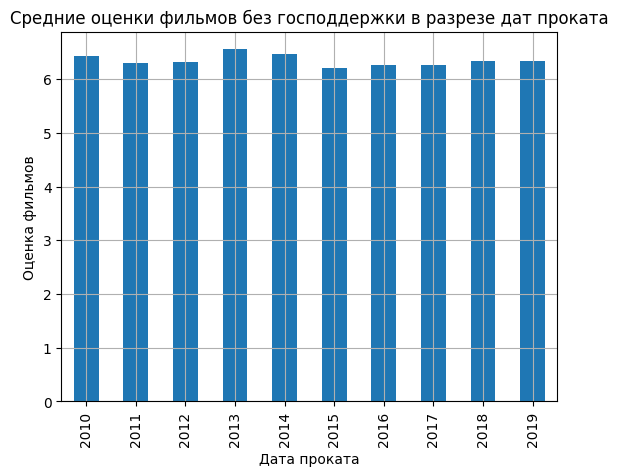

In [ ]:
ave_rating_without_gos = round(data.query('financing_source == "коммерческий проект" and box_office > 0')['ratings'].mean(),2)
display(f'Средняя оценка фильмо исключительно без государтсвенного финансирования: {ave_rating_without_gos}')
display((data
         .query('financing_source == "коммерческий проект" and box_office > 0')
         .pivot_table(index='y_date', values='ratings', aggfunc=['mean'])))
#оценка + табдица в разрезе дат

(data
 .query('financing_source == "коммерческий проект" and box_office > 0')
 .pivot_table(index='y_date', values='ratings', aggfunc=['mean'])
 .plot(xlabel='Дата проката', ylabel='Оценка фильмов', title='Средние оценки фильмов без господдержки в разрезе дат проката', legend=False, kind='bar',grid=True))
plt.show()
#в разрезе дат

**Промежуточный итог:** данные по оценкам  фильмов, даже в срезе дат, не отвечают на вопрос "Почему четвреть спонсируемых фильмов не окупаются?". Мы имеет схожий график по средней оценке в разрезе дат, а также саму среднюю оценку, которая составляет 6.3.

#### Сравнение оценок между по числу прокатов

In [ ]:
avg_punumber_data_gos = data_gos.pivot_table(index='title', values='puNumber', aggfunc=['count'])

avg_punumber_data_gos.reset_index(inplace=True)
avg_punumber_data_gos.columns = ['title', 'count']

display(avg_punumber_data_gos.groupby('count')['count'].count())
#считаю количество выпущенных несколько раз фильмов (считаю по названию фильма)

#avg_punumber_data_gos.groupby('count')['count'].count().plot(kind='bar',grid=True)
#plt.show()
#нет смысла выводить таблицу

count
1    318
Name: count, dtype: int64

count
1    5890
2     426
3     102
4      25
5       1
Name: count, dtype: int64

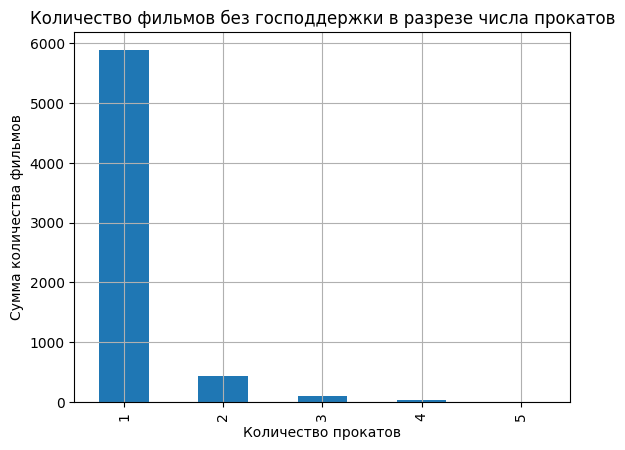

In [ ]:
avg_punumber_without_gos = (data
                            .query('financing_source == "коммерческий проект"')
                            .pivot_table(index='title', values='puNumber', aggfunc=['count']))

avg_punumber_without_gos.reset_index(inplace=True)
avg_punumber_without_gos.columns = ['title', 'count']

display(avg_punumber_without_gos.groupby('count')['count'].count())
#считаю количество выпущенных несколько раз фильмов (считаю по названию фильма)

(avg_punumber_without_gos
 .groupby('count')['count'].count()
 .plot(xlabel='Количество прокатов', ylabel='Сумма количества фильмов', title='Количество фильмов без господдержки в разрезе числа прокатов', legend=False, kind='bar',grid=True))
plt.show()

**Подведем промежуточный итог:** возможно, фильмы не окупаются из-за маленького количество прокатов. Если говорить о фильмах без государственной поддержки, то явно одни и те же картины, прокатывают больше, чем с государственной поддержкой.

**Вывод:**
Был проведен анализ фильмов, получивших государственную поддержку. Разберем каждый шаг:
1. Проведен анализ выпущенных фильмов в разерезе нескольких лет, а также аналих их сборов:
- Графики показали, что с 2015 года по 2018 количество выпущенных фильмов уменьшилось вдвое;
- С другой стороны именно в 2018 году был пройдем пик по сборам - свыше 1 млрд рублей!

2. Проведен анализ в разезе популярных и кассовых жанров:
- Топ три кассовых и популярных жанров: комедия, драма, мультфильм;
- Драма - наиболее популярный жанр, составляет 25% от всех фильмов. Сборы таких фильмов составляют 9.5 млн рублей. Комедия - наиболее кассовый жанр, популярность менее, чем у драм на 5-10%;
- Сборы фильмов с жанром "комедия" составляет 12.5 млн рублей. Комедии собирают больше на на 30% больше, чем драмы.

3. Проведен анализ в разрезе режиссеров фильмов:
- Наибольшее количество фильмов выпущенно у режиссеров: Р. Давлетьярова - 5 фильмов, Д. Дьяченко - 4 фильма, С. Андреасян - 4 фильма;
- Наиболее кассовые фильмы у режиссера: К. Шипенко - 3.8 млрд рублей.

4. Был проведен анализ окупаемости фильмов:
- Фильмы, которые не окупаются сотавили 20%-30%, это говорит нам о том, что почти каждый третий фильм не окупается;
- Фильмы, не окупивших себя, составили - 23% по общим данным.

5. Было принято решение рассмотреть поближе ситуацию с фильмами, которые не окупаются:
- Самые неокупаемые года: 2015 год (пик по выпущенным фильмам) и 2018 год (восстановление производства фильмов после рецессии);
- В каждом году доля неокупивших себя фильмов составляет 70-80%;
- Анализ оценок не показал полезной информации, так как средняя оценка фильмов с государственной поддержкой - 6, без государственной поддержки - 6.3;
- Прокатов у фильмов без государственной поддержки явно больше, чем с ней. Фильмы с государственным финансированием имеют только одно прокатное удостоверение.

В ходе анализа был поднят следующий вопрос: "Почему четвреть спонсируемых фильмов не окупаются?". Ответ на этот вопрос неявный, так как я рассматривают только ~300 фильмов, но предположение сделать можно.

Стоит отметить, что в каждом году доля окупаемых фильмов примерно одинаковая - 70-80%. Возможно, некоторые фильмы не совсем популярны. Данное утверждение можно сделать исходя из фильмов режиссера Давлестьярова. У данного режиссера больше всего картин, но сборы составляют ниже среднего. Также абсолютно все фильмы имеют только одно прокатное удостоверение, хотя у некоторых фильмов их больше 2, 3 и тд.

## Напишите общий вывод

Отметим наиболее интересные моменты на каждом из этапов:

**Первый этап исследования:**

1. Изучен тип данных в колонках и выявлены несоответствия:
    - `puNumber` - тип float;
    - `ratings` - тип object;
    - `show_start_date` - тип object.
2. Выявлено большое количество пустых значений в колонках - до 95.5% пропусков:
    - `refundable_support`       
    - `nonrefundable_support`    
    - `budget`
    - `financing_source`
    
**Второй этап исследования:**

1. Измененил типы колонок в соответствии с замечаниями (пункты 3.1.1 и 3.1.2);
2. Заменены пропуски в колонках (выше описаны названия колонок) с большим количеством пустых значений на 0  в количественных колонках, в колонке категориальной (`financing_source`) изменены на «коммерческий проект» (пункт 3.3);
3. В колонках с текстовыми значениями удалены лишние пробелы в начале и в конце строки, а также приведены к строчным буквам(пункт 3.4)
4. Была удалена строка с пустым прокатным удостоверением (пункт 3.1.1);
5. Была предобработана колонка с рейтингами: проценты перевел в оценку по десятибалльной шкале (пункт 3.1.2);
6. Была предобработана колонка с наименованием страны производителя во избежание дубликатов: заменены дефисы на запятые (пункт 3.2)
7. Объедены таблицы **movies** и **shows** по номеру прокатного удостоверения (пункт 3.2).

**Третий этап исследования:**

1. Анализ количество фильмов в разрезе дат (пункт 4.1):
	- Начиная с 2014 года замечен резкий рост выпускаемых фильмов в прокат;
	- В 2016 и 2018 году замечен пик по выпускаемым фильмам;
	- Суммарный рост с 2014 по 2016 год составил 65-70%;
2. Изучены минимальные и максимальные сборы фильмов в разрезе дат (пункт 4.2):
	- Минимальные сборы составили 22.4 млн рублей в 2010 году;
	- Максимальные сборы составили 49.6 млрд рублей в 2018 году;
	- С 2015 года по 2018 год сборы находятся на одном и том же уровне, максимальная разница (разница между 2015 годом и 2018 годом) не превышает 5%.
3. Проанализирована медиана и среднее значение по таблице со сборами (пункт 4.3):
	- По средней максимальные значения выявлены в 2017 году - 136 млн рублей и в 2018 году - 104 млн рублей;
	- По средней минимальные значения выявлены в 2010 году - 24 тыс рублей;
	- По медиане максимальные значения в 2017 году - 9 млн рублей;
	- По медиане минимальное значение в 2010 году - 1.7 тыс рублей.
4. Анализ сборов фильмов в разрезе возрастных ограничений (пункт 4.4):
    - Больше всего собрали фильмы с ограничением в 12 и 16 лет - 63 млрд рублей и 76 млрд рублей соответственно;
	- Можно отметить преобладание ограничений по сборам в 12 и 16 лет  фильмов с 2015 по 2018 годы;
	- В 2019 году для фильмов с возрастными ограничениями 6, 12, 16 лет сборы становятся на одном уровне;
	- Также в 2019 году фильмы с ограничением 18+ по сборам ниже от остальных на 20%.
    
**Четвертый этап исследования:**

1. Создана отдельная таблица с данными по фильмам с государственной поддержкой (пункт 5.1). Дальнейший анализ основан только на данных с господдержкой;
2. Сумма сборов и выпущенных фильмов в разрезе дат (пункты 5.3 и 5.3):
	- 2017 год стал саммым кассовым фильмом, при этом выпущенных фильмов оказалось на порядок меньше (в 2 раза), чем на пиковых точках;
	- 2015 год - пик выпущенных фильмов в прокат.
3.  Анализ в разрезе жанров (пункт 5.4):
	- Наиболее популярные и кассовые жанры: комедия и драма.
	- Доля драм составляет 30% от всех фильмов со сборами 9.5 млрд рублей;
	- Доля комедий составляет 25% от всех фильмов со сборами 12.4 млрд рублей.
4. Анализ в разрезе режиссеров (пункт 5.5):
	- У режиссера Давлестьярова выпущено наибольшее количество фильмов - 5, в то же время сборы по его фильмам суммарно составляют  299 млн рублей;
	- У режиссера Шипенко выпущено всего 3 фильма, но его сборы составляют 3.8 млрд рублей.
5. Анализ окупаемости фильмов (пункт 5.6):
	- Доля не окупивших себя фильмов составляет - 23%;
	- В соответствии с этим в таблицу была добавлена колонка с информацией об окупаемости фильма (копается/ не окупается);
	- Доля фильмов в разрезе дат, не окупивших себя остается на примерно таком же уровне - 20-30%.
6. Поиск причин высокой доли неокупаемых фильмов (пункт 5.7):
	- Анализ в разрезе оценок не дал показательной информации, так как средняя оценка составила - 6, у фильмов без государственного финансирования - 6.5;
	- У каждого фильма с государственной поддержкой только одно прокатное удостоверение, у фильмов без господдержки, напротив, есть фильмы с 2 и более прокатными удостоверениями.
    
**Подведение итогов:**

Думаю, данные за 2014 год и ниже теряют свою популярность, так как между первыми и последними датам разница 9 лет. Из-за возможной инфляции, ослаблении рубля в 2014 году, поднялись цены на билеты в кино. Поэтому так сильно разнятся данные между кассовыми сборами, бюджетом и проч. Сборы в 2010 году составили 2.4 млн рублей, сборы в 2019 году составили 48.4 млрд рублей - разница в 20.000 между суммами!

Интересная ситуация с кассовыми сборами и возвратными ограничениями фильмов. Высокая динамика фильмов с ограничением 12+ и 16+ и возможный перегрев данных категорий, не популярность ниш 6+ и 18+ в 2019 году показывает равное количество кассовых сборов (за исключением 18+, сборы ниже на 20%). При такой динамике возрастных ограничений, категория 0+ характеризуется минимальной популярностью, а также минимальными сборами

Анализ по фильмам с господдержкой показал, что только четверть фильмов не окупают себя. В процессе поиска причины такой ситуации можно сделать несколько предположений:
- Возможно, работа с множеством разных режиссеров, так как пик по количеству выпущенных фильмов по режиссеру - 5. Это может говорить о возможности государства помогать начинающим, имеющим маленький бюджет, режиссерам;
- Маленькое количество прокатных удостоверений. На каждый фильм, спонсируемый государством, приходится только одно прокатное удостоверение, когда у фильмов без господдержки прокатных удостоверений может быть больше, чем одно.